<center><h1>Perform Data Preprocessing for Machine Learning</h1></center>

# Introduction

Here's an introduction to the lab that covers the key points you mentioned:

Introduction to Exploratory Data Analysis (EDA) and Feature Engineering Lab

Welcome to this hands-on lab on Exploratory Data Analysis (EDA) and Feature Engineering! This lab, adapted from a Cloud Guru course, is designed to give you practical experience with essential techniques for developing robust machine learning models.

In the world of data science and machine learning, understanding your data is crucial before building any predictive models. This lab focuses on three fundamental aspects:

1. Exploratory Data Analysis (EDA): You'll learn how to investigate and summarize your dataset's main characteristics. This process helps you understand the structure of your data, identify patterns, spot anomalies, and form hypotheses.

2. Feature Engineering: You'll practice techniques to create new features or transform existing ones to improve your model's performance. This step is critical in extracting more value from your raw data and can significantly enhance your model's predictive power.

3. Data Story: You'll learn how to weave your findings into a coherent narrative. This skill is essential for communicating your insights effectively to both technical and non-technical stakeholders.

These three elements form the foundation of any successful machine learning project. By mastering these techniques, you'll be well-equipped to tackle more complex modeling tasks in the future.

Throughout this lab, you'll work with real-world data, applying various methods and tools commonly used in the industry. By the end, you'll have a solid understanding of how to approach a dataset, extract meaningful insights, and prepare it for machine learning modeling.
What do you need: 
-This Jupyter Notebook;
-Employee_encoding.csv Data File

Let's dive in and start exploring our data!

# 1) Import the Libraries

In [95]:
import numpy as np
import pandas as pd
#Required for encoding purposes
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#Required for scaling purposes
from sklearn.preprocessing import MinMaxScaler

#Required for binning purposes
from sklearn.preprocessing import KBinsDiscretizer

# Required for plotting charts
import matplotlib.pyplot as plt

import seaborn as sns

# 2)Read the data

In [97]:
# TODO: Read the "Employee_encoding.csv" file and display the first few rows.
employee_df = pd.read_csv('Employee_encoding.csv')
employee_df.head()


,employee_id,first_name,last_name,age,gender,department,salary,title
0,1,John,Doe,35,Male,Marketing,50000,developer
1,2,Jane,Smith,28,Female,Sales,60000,senior developer
2,3,Michael,Johnson,42,Male,Finance,70000,manager
3,4,Emily,Williams,31,Female,HR,55000,vp
4,5,James,Brown,37,Male,Operations,65000,developer


# 3) Encoding Techniques

<h1> 3.1) Ordinal Encoding </h1>


1.
Ordinal Encoding transforms categorical data into numerical values while maintaining an order or ranking. This method is particularly useful for ordinal categories where a natural order exists, such as educational qualifications or satisfaction scales.

2.
When applying Ordinal Encoding, categories are assigned consecutive whole numbers that reflect their relative position or rank. This allows machine learning algorithms to work with categorical data while considering the inherent order of the categories.

3.
Unlike One-Hot Encoding, Ordinal Encoding preserves the ordinal relationships between categories. However, it can falsely imply an equal distance between categories. Therefore, it is important to consider the nature of the data and the requirements of the specific machine learning model before deciding to use Ordinal Encoding.

In [101]:
# Initialize the oridnal encoder and perform fit operation
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(employee_df['title'].values.reshape(-1,1))
ordinal_encoder.categories_

[array(['developer', 'manager', 'senior developer', 'vp'], dtype=object)]

In [102]:
ordinal_encoder.categories_ = [['developer','senior developer','manager','vp']]

In [103]:
# TODO: Transform the title feature and assign the results to a new feature named "encoded_title" and print the top few rows.
# Ensure the new feature contains encoded values.
employee_df['encoded_title'] = ordinal_encoder.transform(employee_df['title'].values.reshape(-1,1))
employee_df[['encoded_title', 'title']].head()


,encoded_title,title
0,0.0,developer
1,1.0,senior developer
2,2.0,manager
3,3.0,vp
4,0.0,developer


# 3.2) One-hot Encoding



1)
One-hot encoding is a method for converting categorical data into a binary representation. In this process, a separate column is created for each category, and in this column, a "1" is set if the element belongs to this category, and "0" for all other categories.

2)
Example: Suppose we have a category "Color" with the values "Red", "Blue", and "Green". Through one-hot encoding, three new columns are created: "Red", "Blue", and "Green". For each data element, a "1" is then set in the corresponding column depending on which color it is, and a "0" in the other columns.

3)
This method is frequently used in machine learning to utilize non-numerical data for models.

In [114]:
gender_encoder = OneHotEncoder()

In [115]:
# TODO: Apply the encoder's "fit_transform" on the "gender" feature
transform = gender_encoder.fit_transform(employee_df['gender'].values.reshape(-1,1))


In [116]:
employee_df1 = pd.DataFrame(transform.todense(), columns=gender_encoder.categories_)
employee_df = employee_df.join(employee_df1)
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary,title,encoded_title,"(Female,)","(Male,)"
0,1,John,Doe,35,Male,Marketing,50000,developer,0.0,0.0,1.0
1,2,Jane,Smith,28,Female,Sales,60000,senior developer,1.0,1.0,0.0
2,3,Michael,Johnson,42,Male,Finance,70000,manager,2.0,0.0,1.0
3,4,Emily,Williams,31,Female,HR,55000,vp,3.0,1.0,0.0
4,5,James,Brown,37,Male,Operations,65000,developer,0.0,0.0,1.0


# 3.3) Label Encoding


1)
Label Encoding is a method for converting categorical data into numerical values. Each category is assigned a unique integer. Unlike One-Hot-Encoding, this method doesn't create a separate column for each category, but instead simply numbers the categories.

2)
Example: If we again have a category "Color" with the values "Red", "Blue", and "Green", Label Encoding could transform them as follows: "Red" = 0, "Blue" = 1, "Green" = 2.

3)
Label Encoding is a simple and space-saving encoding method, but it's not always well-suited for machine learning models because it assumes an ordinal relationship between categories. This means the model might think that "Green" (2) is somehow "greater" or "better" than "Blue" (1), which isn't always meaningful, especially for categories without an inherent order.

Difference between Ordinal and Label Encoding

1. Ordinal Encoding:
Inherent Order: Used when categories have a meaningful order. Example: "Size": "Small" = 0, "Medium" = 1, "Large" = 2 (Small < Medium < Large). Suitable for: Categories with a clear, ordinal relationship.

2. Label Encoding:
No Order: Used for categories without a fixed order and assigns arbitrary numbers. Example: "Color": "Red" = 0, "Blue" = 1, "Green" = 2 (no relationship between the values). Suitable for: Disorderly categories, but can suggest false ordinal relationships.


In [119]:
# TODO: Initialize "LabelEncoder" and assign it to a variable "department_encoder"
department_encoder = LabelEncoder()

In [120]:
employee_df['encoded_department'] = department_encoder.fit_transform(employee_df['department'])
department_encoder.classes_

array(['Finance', 'HR', 'IT', 'Marketing', 'Operations', 'Sales'],
      dtype=object)

In [121]:
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary,title,encoded_title,"(Female,)","(Male,)",encoded_department
0,1,John,Doe,35,Male,Marketing,50000,developer,0.0,0.0,1.0,3
1,2,Jane,Smith,28,Female,Sales,60000,senior developer,1.0,1.0,0.0,5
2,3,Michael,Johnson,42,Male,Finance,70000,manager,2.0,0.0,1.0,0
3,4,Emily,Williams,31,Female,HR,55000,vp,3.0,1.0,0.0,1
4,5,James,Brown,37,Male,Operations,65000,developer,0.0,0.0,1.0,4


# 4) Scaling Techniques


Why do we scale data?
Scaling data, especially when using the MinMaxScaler, has several important reasons:

1. Comparability of features:
When different features are present in very different orders of magnitude (e.g., age from 0-100 and salary from 0-1,000,000), this can impair the performance of many machine learning algorithms. Scaling brings all features to the same value range, improving their comparability.

2. Improved convergence for gradient-based algorithms:
Algorithms like the gradient descent method converge faster when the input data have similar orders of magnitude.

3. Avoidance of numerical instability:
Large numbers can lead to numerical instability in some algorithms. Scaling helps to avoid this.
Interpretation of coefficients: For some models, such as linear regression, scaling facilitates the interpretation of coefficients as all features have the same value range.

4. Fulfillment of model assumptions:
Some algorithms, like k-Nearest Neighbors (KNN), work better or even assume that all features are on the same scale.

5. Processing of outliers:
The MinMaxScaler in particular can help reduce the influence of outliers by bringing all values into a fixed range (typically 0 to 1).

The use of the MinMaxScaler specifically transforms all values into a range between 0 and 1, where the smallest value is mapped to 0 and the largest to 1. This preserves the relative distances between data points but normalizes the entire value range.

In [124]:
# We will scale the salary feature using MinMaxScaler

mmscaler = MinMaxScaler(clip=True)
mmscaler.fit(employee_df['salary'].values.reshape(-1,1))
employee_df['salary_minmax_scaled'] = mmscaler.transform(employee_df['salary'].values.reshape(-1,1))

In [125]:
employee_df[['salary','salary_minmax_scaled']].head()


,salary,salary_minmax_scaled
0,50000,0.000000
1,60000,0.121951
2,70000,0.243902
3,55000,0.060976
4,65000,0.182927


In [126]:
# TODO: Invoke "describe" function on the new feature 'salary_minmax_scaled'.
# ensure the minimum value is 0 and the maximum value is 1
employee_df[['salary_minmax_scaled','salary']].describe()


,salary_minmax_scaled,salary
count,100.000000,100.000000
mean,0.388537,81860.000000
std,0.229024,18779.969987
min,0.000000,50000.000000
25%,0.219512,68000.000000
50%,0.347561,78500.000000
75%,0.521341,92750.000000
max,1.000000,132000.000000


# 5) Binning Techniques



**Binning** is a technique for grouping continuous data into discrete categories or "bins". This method is frequently used in data preprocessing to simplify analysis and recognize patterns in the data. Here are some important points about binning:

### 1. **Purpose of Binning**:
- **Complexity Reduction**: By grouping values into bins, the data can become less complex and easier to analyze.
- **Increased Robustness**: Binning can reduce the effects of outliers, as extreme values fall into the same bin as other, less extreme values.

### 2. **Types of Binning**:
- **Equal-width Binning**: Here, the intervals are evenly distributed. For example, the range from 0 to 100 can be divided into five bins of 0-20, 21-40, 41-60, 61-80, and 81-100.
  
- **Equal-frequency Binning**: In this method, the bins are defined to contain the same number of data points. For example, one could divide the data into four bins, each containing 25% of the data points.

### 3. **Applications**:
- **Data Visualization**: Binning facilitates the creation of histograms and other charts to visualize the distribution of data.
- **Machine Learning**: Binning can be used as a preprocessing step to convert continuous features into categorical features, which can simplify modeling.

In [129]:
# TODO: Initialize "KBinsDiscretizer" with 10 bins, setting the strategy to "quantile" and encode to "ordinal" 
kbins = KBinsDiscretizer(n_bins=10, strategy='quantile', encode='ordinal')

In [130]:
employee_df['age_bin'] = kbins.fit_transform(employee_df['age'].values.reshape(-1,1))
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary,title,encoded_title,"(Female,)","(Male,)",encoded_department,salary_minmax_scaled,age_bin
0,1,John,Doe,35,Male,Marketing,50000,developer,0.0,0.0,1.0,3,0.000000,7.0
1,2,Jane,Smith,28,Female,Sales,60000,senior developer,1.0,1.0,0.0,5,0.121951,2.0
2,3,Michael,Johnson,42,Male,Finance,70000,manager,2.0,0.0,1.0,0,0.243902,9.0
3,4,Emily,Williams,31,Female,HR,55000,vp,3.0,1.0,0.0,1,0.060976,4.0
4,5,James,Brown,37,Male,Operations,65000,developer,0.0,0.0,1.0,4,0.182927,9.0


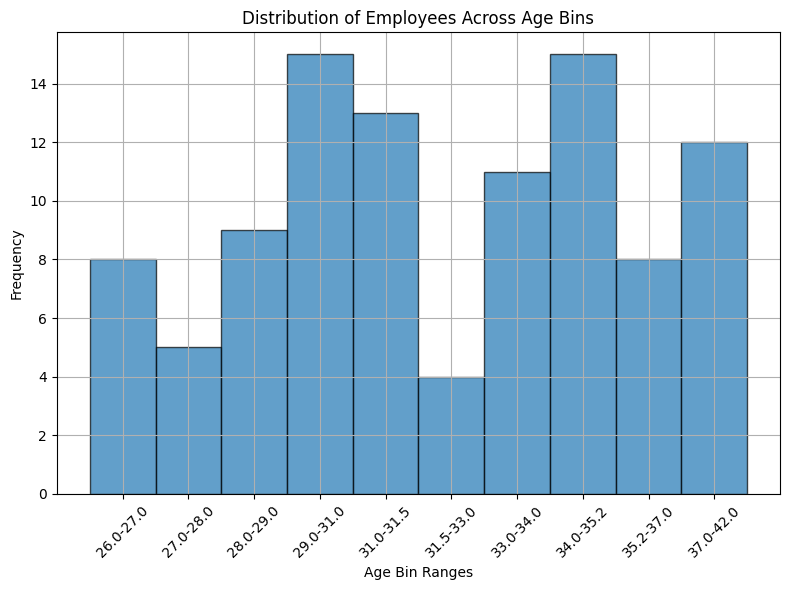

In [151]:
bin_edges = kbins.bin_edges_[0]

# Plot the histogram of the binned ages
plt.figure(figsize=(8, 6))
plt.hist(employee_df['age_bin'], bins=np.arange(11) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(10), [f'{bin_edges[i]:.1f}-{bin_edges[i+1]:.1f}' for i in range(len(bin_edges)-1)], rotation=45)

# Add labels and title
plt.xlabel('Age Bin Ranges')
plt.ylabel('Frequency')
plt.title('Distribution of Employees Across Age Bins')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


## Correlation Matrix for Feature Engineering

A correlation matrix is an important tool in feature engineering as it helps to understand the relationships between various features of a dataset. Here are some reasons why a correlation matrix is useful:

1. Identification of Relationships
* The correlation matrix shows how strongly and in which direction features correlate with each other. A high positive or negative correlation can indicate that the features are related to each other.

2. Reduction of Redundancy
* When two or more features are strongly correlated, one of these features can possibly be removed to reduce model complexity and improve interpretability. This helps to avoid redundant information.

3. Selection of Relevant Features
* By analyzing the correlation, relevant features can be identified that have a significant influence on the target (e.g., the target variable in a prediction model). Features with low or no correlation to the target variable can potentially be omitted.

4. Avoidance of Multicollinearity
* Multicollinearity occurs when two or more independent variables are strongly correlated with each other, which can affect the stability of estimates in a regression model. The correlation matrix helps to identify such problems early on.

5. Preparation for Modeling
* A better understanding of the relationships between features can help select appropriate models and create specific transformations or interactions that improve predictive performance.


Correlation Matrix:
                       employee_id       age    salary  encoded_title  \
employee_id              1.000000 -0.036455  0.658322       0.775709   
age                     -0.036455  1.000000 -0.112292       0.040457   
salary                   0.658322 -0.112292  1.000000       0.528955   
encoded_title            0.775709  0.040457  0.528955       1.000000   
(Female,)                0.017321 -0.847311  0.193730       0.034369   
(Male,)                 -0.017321  0.847311 -0.193730      -0.034369   
encoded_department      -0.022086 -0.374168 -0.228128      -0.077309   
salary_minmax_scaled     0.658322 -0.112292  1.000000       0.528955   
age_bin                 -0.001690  0.985482 -0.081667       0.035058   

                      (Female,)   (Male,)  encoded_department  \
employee_id            0.017321 -0.017321           -0.022086   
age                   -0.847311  0.847311           -0.374168   
salary                 0.193730 -0.193730           -0.228128 

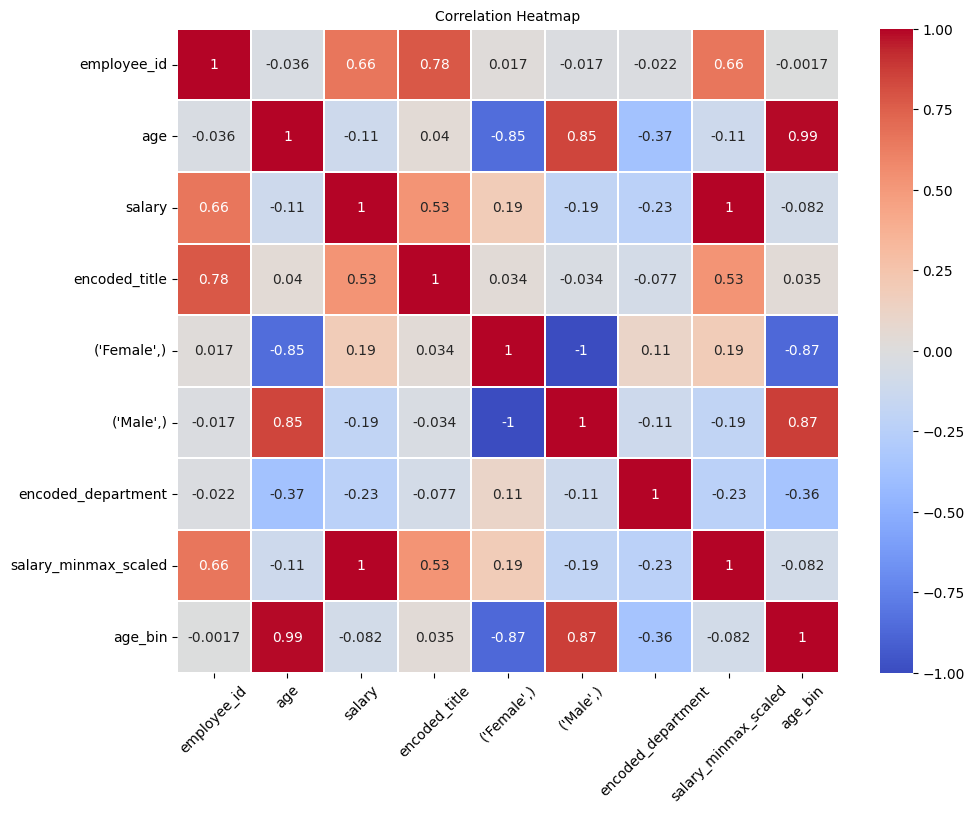

In [134]:
# Select all numeric columns for correlation analysis, including encoded columns
numeric_columns = employee_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation_matrix = employee_df[numeric_columns].corr()

# Print the correlation matrix
print("\nCorrelation Matrix:\n", correlation_matrix)

# Create a seaborn heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Heatmap', fontsize=10)
plt.xticks(rotation=45)  # Rotate tick labels for better readability
plt.tight_layout(pad=0.2)  # Adjust tight_layout parameters
plt.show()



## Explanation of the Correlation Matrix, starting developing the Data Story

A correlation matrix provides a summary of how different features (variables) in a dataset relate to each other. Each cell in the matrix shows the correlation coefficient between two features, with values ranging from -1 to 1:
* **1** indicates a perfect positive correlation (as one feature increases, the other also increases).
* **-1** indicates a perfect negative correlation (as one feature increases, the other decreases).
* **0** indicates no correlation.

1. Features Overview:
* **employee_id**: Unique identifier for each employee (typically not correlated with other features).
* **age**: Age of the employee.
* **salary**: Salary of the employee.
* **(Female,)** and **(Male,)**: Categorical features indicating gender, encoded as binary variables.
* **encoded_department**: Encoded values for the department to which the employee belongs.
* **salary_minmax_scaled**: Salary that has been scaled to a range (0 to 1).
* **age_bin**: Binned values of age, likely indicating different age categories.
* **encoded_title**: Encoded values for the employee's job title.

2. Important Observations:
* **employee_id**:
   * Weak correlations with most features, as expected for an identifier.
* **age**:
   * **Negative correlation with salary**: The correlation coefficient of -0.112 suggests a slight inverse relationship; as age increases, salary doesn't significantly increase.
   * **Strong negative correlation with Female**: A correlation of -0.847 indicates that as the number of females in the dataset increases, the average age of employees tends to decrease.
   * **Strong positive correlation with Male**: A correlation of 0.847 indicates that as the number of males increases, the average age also tends to increase.
* **salary**:
   * **Strong positive correlation with employee_id**: This value (0.658) suggests that higher salaries may be associated with certain employee IDs.
   * **Correlation with gender**: There's a moderate positive correlation with (Female,) (0.194) and a negative correlation with (Male,) (-0.194), suggesting higher salaries might be associated with female employees.
* **encoded_department**:
   * **Negative correlation with age**: This feature has a correlation of -0.374 with age, suggesting younger employees might belong to certain departments.
* **salary_minmax_scaled**:
   * This feature shows a strong positive correlation (1.000) with salary, as expected since it's a scaled version of the same data.
* **age_bin**:
   * **Strong positive correlation with age**: The correlation of 0.985 indicates that the binned age categories closely align with the actual age values.
   * **Strong negative correlation with Female**: The correlation of -0.871 suggests that females tend to be less represented in older age bins.
* **encoded_title**:
   * Shows a strong positive correlation (0.776) with salary, indicating that certain job titles are associated with higher salaries.
   * Minimal correlation with age (0.040), suggesting no strong relationship between job title and age.
